In [1]:
import ipywidgets as widgets
widgets.IntSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Element order:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=1, continuous_update=False, description='Element order:', max=5, min=1)

[poly1d([ 2., -3.,  1.]), poly1d([-4.,  4.,  0.]), poly1d([ 2., -1.,  0.])]
[0.  0.5 1. ]
fs
[1. 0. 0.]


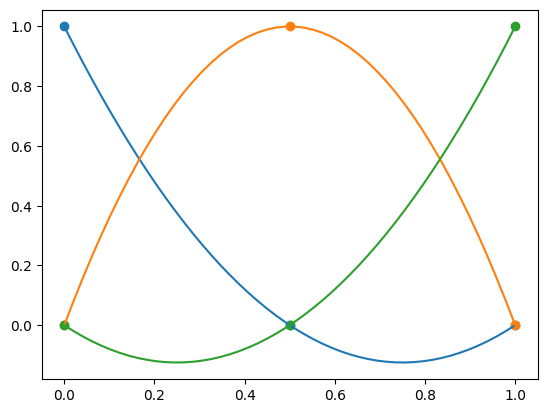

In [45]:
import numpy as np
from scipy.interpolate import lagrange

def generate_lagrange_polynomial(a,b,order):
    num_points = order + 1
    xis = np.linspace(a,b,num_points)
    lagrange_polys  = []
    lagrange_poly_fs = []
    for i in range(num_points):
        fs = np.zeros(num_points)
        fs[i] = 1
        lagrange_poly_fs.append(fs)
        lagrange_polys.append(lagrange(xis,lagrange_poly_fs[i]))
    return xis, lagrange_poly_fs, lagrange_polys

a, b = 0, 1
xs = np.linspace(a,b,50)
order = 2
xis, fs, polys = generate_lagrange_polynomial(a,b,order)
print(polys)
# plt.figure()
print(xis)
print("fs")
print(fs[0])
for i in range(order+1):
    plt.scatter(xis, fs[i])
    plt.plot(xs, polys[i](xs))
# plt.show()

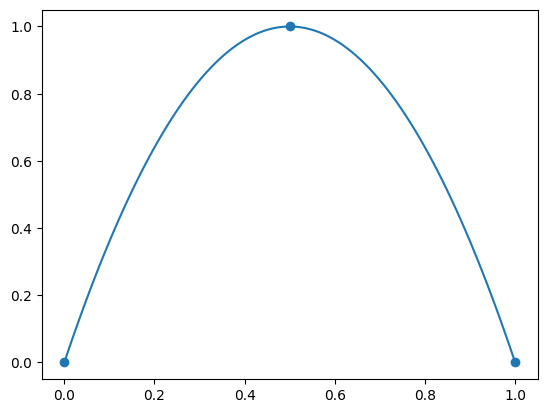

In [11]:
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
Polynomial(poly.coef[::-1]).coef
x = np.linspace(0, 1, 100)
plt.scatter(xi, fi, label='data')
plt.plot(x, Polynomial(poly.coef[::-1])(x), label='Polynomial')


In [12]:

import scipy.linalg as la

import scipy.interpolate as ip

# Define hat functions via np.piecewise
def hatfun(xn, i, x):
    N = len(xn) - 1
    if i == 0:
        return np.piecewise(x, 
                            [(xn[0] <= x) & (x <= xn[1])], 
                            [lambda x: (xn[1] - x)/(xn[1] - xn[0]), 0])
    elif i == N:     
        return np.piecewise(x, 
                            [(xn[N-1] <= x) & (x <=  xn[N])], 
                            [lambda x: (x - xn[i-1])/(xn[N] - xn[N-1]), 0])
    else:
        return np.piecewise(x, 
                            [(xn[i-1] <= x) & (x <= xn[i]),
                             (xn[i]   <= x) & (x <=  xn[i+1])], 
                             [lambda x: (x - xn[i-1])/(xn[i] - xn[i-1]),
                              lambda x: (xn[i+1] - x)/(xn[i+1] - xn[i]), 
                              0])
        
def interp1d(f, xn, x):
    # Evaluate f at node points
    fn = f(xn)
    # Now write array [f(x_0)*phi(x,0), f(x_1)*phi(x,1), .... ]
    # where f(x_0)*phi(x,0) is either a scalar if x is scalar, otherwise
    # it is a vector
    l = np.array([fn[i]*hatfun(xn, i, x) for i in range(0,len(xn))])
    # Now sum of axis zero to compute resulting interpolant values
    return np.sum(l, axis=0)    




<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mx/4vjtl6c96dx1929ct15vd50h0000gn/T/ipykernel_20156/4081095088.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, phi_i, label=("$\phi_{%d}$"%i))
/var/folders/mx/4vjtl6c96dx1929ct15vd50h0000gn/T/ipykernel_20156/4081095088.py:37: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, interp1d(f, xn, x), "--"+c, label="$\pi "+l+"$")


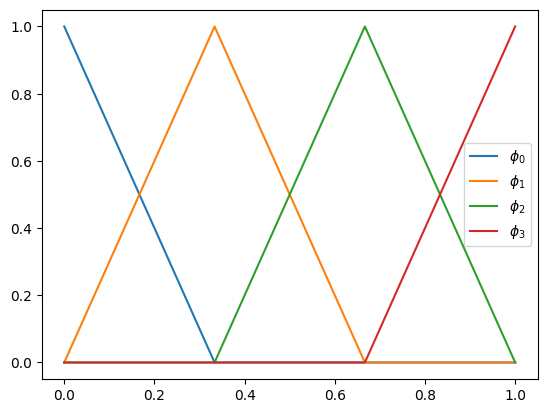

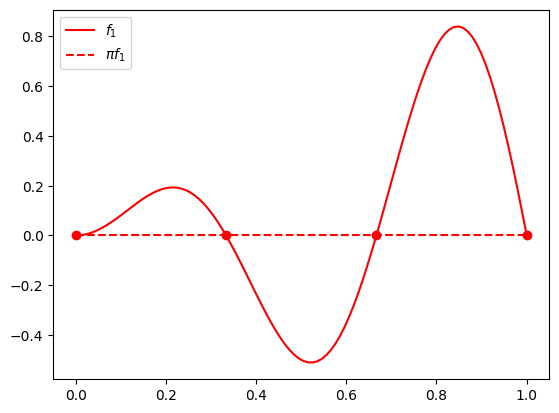

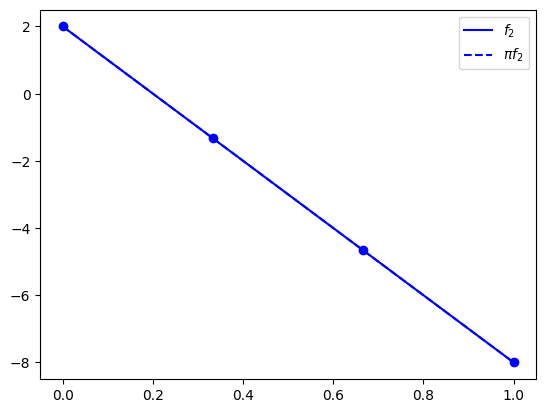

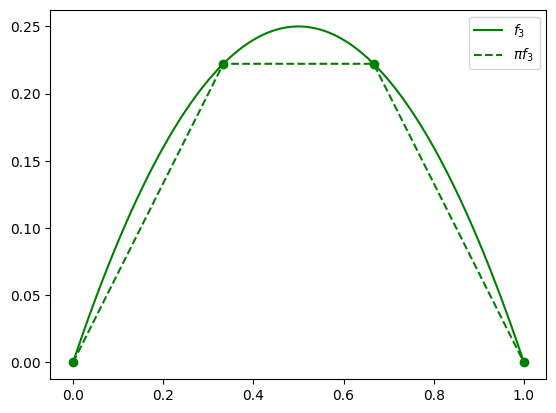

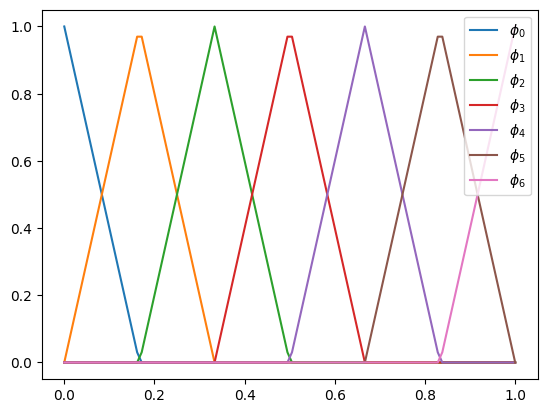

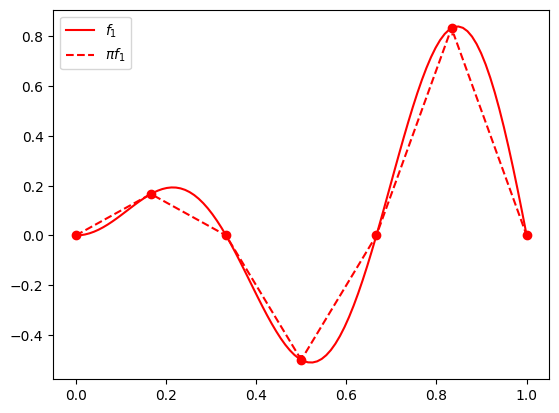

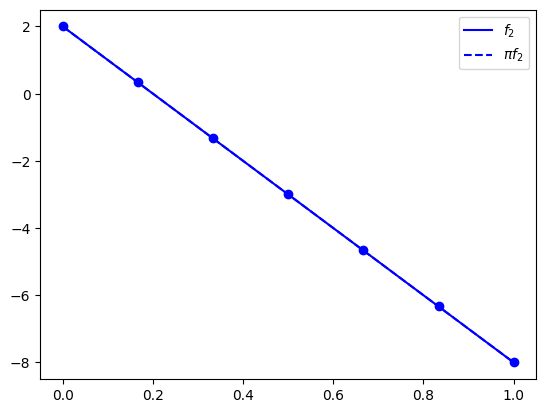

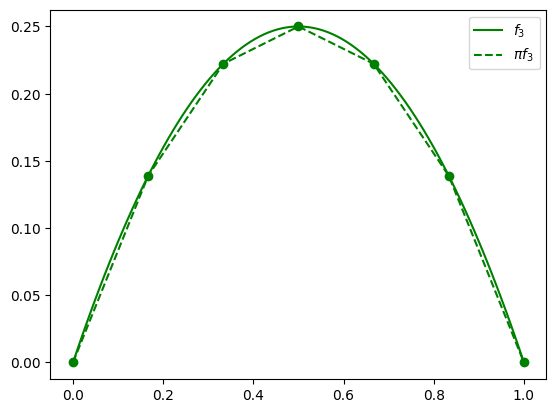

In [18]:
# Define functions to interpolate
def f_1(x):
    return x*np.sin(3*np.pi*x)

def f_2(x):
    return 2-10*x

def f_3(x):
    return x*(1-x)

# Get colors, labels
colors = ["r", "b", "g"] 
labels = ["f_1", "f_2", "f_3"] 
functions = [f_1, f_2, f_3]

for N in [4, 7]:

    # Define nodes
    xn = np.linspace(0, 1, N)

    # Finer sampling for plotting
    x = np.linspace(0, 1, 100)

    # Plot hat functions 
    plt.figure()
    for i in range(0,N):
        phi_i = hatfun(xn, i, x)
        plt.plot(x, phi_i, label=("$\phi_{%d}$"%i))
    plt.legend()

    # Get a new figure
    for f,c,l in zip(functions, colors, labels):
        # Plot them
        plt.figure()
        plt.plot(x, f(x), "-"+c, label="$"+l+"$")
        plt.plot(xn, interp1d(f, xn, xn), "o"+c)
        plt.plot(x, interp1d(f, xn, x), "--"+c, label="$\pi "+l+"$")
        plt.legend()

plt.show()
